# Master EDA Notebook

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.iat[15856,3] = 3

In [4]:
df['date'] = pd.to_datetime(df['date'])


In [5]:
from sklearn.preprocessing import MinMaxScaler
min_date = df.date.min()
df['diff_date'] = df.date - min_date
df['diff_date'] = df.diff_date.astype('timedelta64[D]').astype('int')

In [6]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,diff_date
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,164
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,221
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,299
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,221
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,19
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,297
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,52
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,259


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [8]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
diff_date           0
dtype: int64

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,diff_date
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,180.180997
std,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,113.059987
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,81.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,167.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,291.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,390.000000


In [10]:
frame = pd.DataFrame(df.dtypes)
categoricals = list(frame.loc[frame.iloc[:,0]=='object'].iloc[:,0].keys())
for col in categoricals:
    print(col,"\n",df[col].value_counts().sort_values(ascending=False),"\n")

waterfront 
 NO     19075
YES      146
Name: waterfront, dtype: int64 

view 
 NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64 

condition 
 Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64 

grade 
 7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64 

sqft_basement 
 0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2120.0        1
295.0         1
207.0         1
915.0         1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64 



In [11]:
def mean_fill_nan(d_frame,col_list):
    for x in col_list:
        d_frame[x].fillna(d_frame[x].mean(),inplace = True)

def median_fill_nan(d_frame,col_list):
    for x in col_list:
        d_frame[x].fillna(d_frame[x].mean(),inplace = True)

def mode_fill_nan(d_frame,col_list):
    for x in col_list:
        d_frame[x].fillna(d_frame[x].mode(),inplace = True)

def drop_columns(d_frame):
    for x in col_list:
        d_frame.drop(labels = x,axis = 1)

def create_dummy_nan(d_frame,col_list):
    for x in col_list:
        d_frame['missing_'+x] = d_frame[x].apply(lambda v: pd.isna(v)*1)
        d_frame[x].fillna(0,inplace=True)

def drop_remaining_rows_nan(d_frame):
    d_frame.dropna(axis=0, how='any',inplace = True)

In [12]:
for z,i  in enumerate(df['sqft_basement']):
    if i == '?':
        print(z)
        df.loc[z,'sqft_basement'] = df.loc[z,'sqft_living'] - df.loc[z, 'sqft_above']
df['perc_basement'] = df.sqft_basement.astype('float') / df['sqft_living']
df.drop(columns=['sqft_basement','sqft_above'],inplace=True)

6
18
42
79
112
115
217
309
384
508
633
645
664
671
685
755
881
890
995
1073
1105
1205
1354
1356
1366
1476
1558
1600
1662
1669
1768
1804
1852
2041
2123
2126
2133
2152
2164
2199
2216
2325
2474
2525
2584
2612
2658
2662
2779
2922
3017
3018
3026
3074
3095
3134
3138
3204
3327
3375
3489
3615
3804
3857
3913
4008
4052
4094
4170
4171
4179
4194
4317
4365
4372
4503
4529
4591
4618
4677
4713
4763
4776
4783
4830
4910
4913
4933
4971
4996
4997
5015
5139
5191
5192
5371
5376
5386
5403
5409
5481
5539
5543
5607
5627
5677
5691
5757
5765
5798
5812
5874
5953
6004
6028
6051
6072
6074
6080
6139
6229
6311
6325
6353
6388
6410
6414
6563
6580
6631
6655
6712
6747
6763
6787
6966
6984
7070
7158
7213
7311
7325
7356
7430
7445
7528
7563
7566
7588
7589
7620
7652
7806
7818
7828
7921
8007
8038
8039
8057
8075
8094
8202
8212
8340
8354
8548
8565
8576
8644
8654
8655
8671
8768
8792
8898
8905
8985
9000
9052
9098
9103
9106
9118
9130
9202
9277
9315
9330
9364
9402
9442
9495
9516
9545
9589
9715
9758
9809
9836
9864
10014
10089
10094
1

In [13]:
df.condition

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [14]:
df.condition.unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [15]:
condition_list = ['Poor','Fair','Average','Good','Very Good']
df.condition.replace(condition_list,list(range(0,5)),inplace=True)

In [16]:
df.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [17]:
ser = []
for x in df.grade:
    ser.append(x.split(' ')[0])
df['grade'] = ser
df['grade'] = df['grade'].astype('int') - 3

In [18]:
df.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [19]:
df.view.replace(['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'],list(range(0,5)), inplace = True)
df.view.fillna(0, inplace = True)
df['view'] = df.view.astype('int')

In [20]:
df.view.value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: view, Length: 21597, dtype: int32>

In [21]:
df['sqft_living15'] = df.sqft_living15/df.sqft_living

In [22]:
df['sqft_lot15'] = df.sqft_lot15/df.sqft_lot

In [23]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,diff_date,perc_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0,...,4,1955,0.0,98178,47.5112,-122.257,1.135593,1.000000,164,0.000000
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,0,...,4,1951,1991.0,98125,47.7210,-122.319,0.657588,1.054819,221,0.155642
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,0,...,3,1933,NaN,98028,47.7379,-122.233,3.532468,0.806200,299,0.000000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,0,...,4,1965,0.0,98136,47.5208,-122.393,0.693878,1.000000,221,0.464286
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,0,...,5,1987,0.0,98074,47.6168,-122.045,1.071429,0.928589,292,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,0,...,5,2009,0.0,98103,47.6993,-122.346,1.000000,1.334218,19,0.000000
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,0,...,5,2014,0.0,98146,47.5107,-122.362,0.792208,1.238603,297,0.000000
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,0,...,4,2009,0.0,98144,47.5944,-122.299,1.000000,1.486667,52,0.000000
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0,...,5,2004,0.0,98027,47.5345,-122.069,0.881250,0.538945,259,0.000000


In [24]:
#I'm going to replace the yes and no to 1 and zero to make modeling easier
#Im going to fill in the nulls for NO because there are so few yes as it is although this might cause problems
#i could check the lat and longs to find which houses border water to be more accurate but thats a bit above my pay grade right now

df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].isnull().any()
df['waterfront'] = df['waterfront'].replace(['NO','YES'],[0, 1])

In [25]:
df.floors

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
21592    3.0
21593    2.0
21594    2.0
21595    2.0
21596    2.0
Name: floors, Length: 21597, dtype: float64

In [26]:
df['storeys'] = df['floors'].astype('int')

In [27]:
df = pd.get_dummies(df, columns=['floors'])
df['half_floor'] = df['floors_1.5'] + df['floors_2.5'] + df['floors_3.5']

In [28]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'diff_date', 'perc_basement', 'storeys', 'floors_1.0', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'half_floor'],
      dtype='object')

In [29]:
df['has_stairs_inside'] = df['floors_1.0'].replace({0:1,1:0})

In [30]:

df.drop(columns=['floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5'], inplace=True)

In [31]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,diff_date,perc_basement,storeys,half_floor,has_stairs_inside
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,0,0,2,...,98178,47.5112,-122.257,1.135593,1.000000,164,0.000000,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,0,0,2,...,98125,47.7210,-122.319,0.657588,1.054819,221,0.155642,2,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,0,0,2,...,98028,47.7379,-122.233,3.532468,0.806200,299,0.000000,1,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,0,0,4,...,98136,47.5208,-122.393,0.693878,1.000000,221,0.464286,1,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,0,0,2,...,98074,47.6168,-122.045,1.071429,0.928589,292,0.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,0,0,2,...,98103,47.6993,-122.346,1.000000,1.334218,19,0.000000,3,0,1
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,0,0,2,...,98146,47.5107,-122.362,0.792208,1.238603,297,0.000000,2,0,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,0,0,2,...,98144,47.5944,-122.299,1.000000,1.486667,52,0.000000,2,0,1
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,0,0,2,...,98027,47.5345,-122.069,0.881250,0.538945,259,0.000000,2,0,1


In [32]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
ser = []
for i,v in enumerate(df.yr_renovated):
    app = None
    if v != 0:
        app = v
    else:
        app = df.yr_built[i]
    ser.append(app)

df['last_work_done'] = ser
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,diff_date,perc_basement,storeys,half_floor,has_stairs_inside,last_work_done
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,0,0,2,...,47.5112,-122.257,1.135593,1.000000,164,0.000000,1,0,0,1955.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,0,0,2,...,47.7210,-122.319,0.657588,1.054819,221,0.155642,2,0,1,1991.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,0,0,2,...,47.7379,-122.233,3.532468,0.806200,299,0.000000,1,0,0,1933.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,0,0,4,...,47.5208,-122.393,0.693878,1.000000,221,0.464286,1,0,0,1965.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,0,0,2,...,47.6168,-122.045,1.071429,0.928589,292,0.000000,1,0,0,1987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,0,0,2,...,47.6993,-122.346,1.000000,1.334218,19,0.000000,3,0,1,2009.0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,0,0,2,...,47.5107,-122.362,0.792208,1.238603,297,0.000000,2,0,1,2014.0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,0,0,2,...,47.5944,-122.299,1.000000,1.486667,52,0.000000,2,0,1,2009.0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,0,0,2,...,47.5345,-122.069,0.881250,0.538945,259,0.000000,2,0,1,2004.0


In [33]:
from geopy.distance import geodesic as GD

In [34]:
lat_seattle_downtown = 47.6050
long_seattle_downtown = -122.334
df['lat_long_tup'] = tuple(zip(df.lat,df.long))
df['dist_to_seattle'] = df.lat_long_tup.map(lambda x: GD(x,(lat_seattle_downtown,long_seattle_downtown)).km)
df.drop(columns = ['lat_long_tup'],inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,diff_date,perc_basement,storeys,half_floor,has_stairs_inside,last_work_done,dist_to_seattle
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,0,0,2,...,-122.257,1.135593,1.000000,164,0.000000,1,0,0,1955.0,11.930775
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,0,0,2,...,-122.319,0.657588,1.054819,221,0.155642,2,0,1,1991.0,12.946433
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,0,0,2,...,-122.233,3.532468,0.806200,299,0.000000,1,0,0,1933.0,16.609359
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,0,0,4,...,-122.393,0.693878,1.000000,221,0.464286,1,0,0,1965.0,10.361036
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,0,0,2,...,-122.045,1.071429,0.928589,292,0.000000,1,0,0,1987.0,21.767956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,0,0,2,...,-122.346,1.000000,1.334218,19,0.000000,3,0,1,2009.0,10.523295
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,0,0,2,...,-122.362,0.792208,1.238603,297,0.000000,2,0,1,2014.0,10.694116
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,0,0,2,...,-122.299,1.000000,1.486667,52,0.000000,2,0,1,2009.0,2.883837
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,0,0,2,...,-122.069,0.881250,0.538945,259,0.000000,2,0,1,2004.0,21.424889


In [35]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'diff_date', 'perc_basement', 'storeys', 'half_floor',
       'has_stairs_inside', 'last_work_done', 'dist_to_seattle'],
      dtype='object')

In [36]:
ext_df = df
df = df.drop(columns = ['id', 'date', 'yr_renovated','has_stairs_inside', 'lat', 'long', 'diff_date','half_floor'])

In [37]:
#pd.plotting.scatter_matrix(df,figsize = (50,50),alpha = .01);

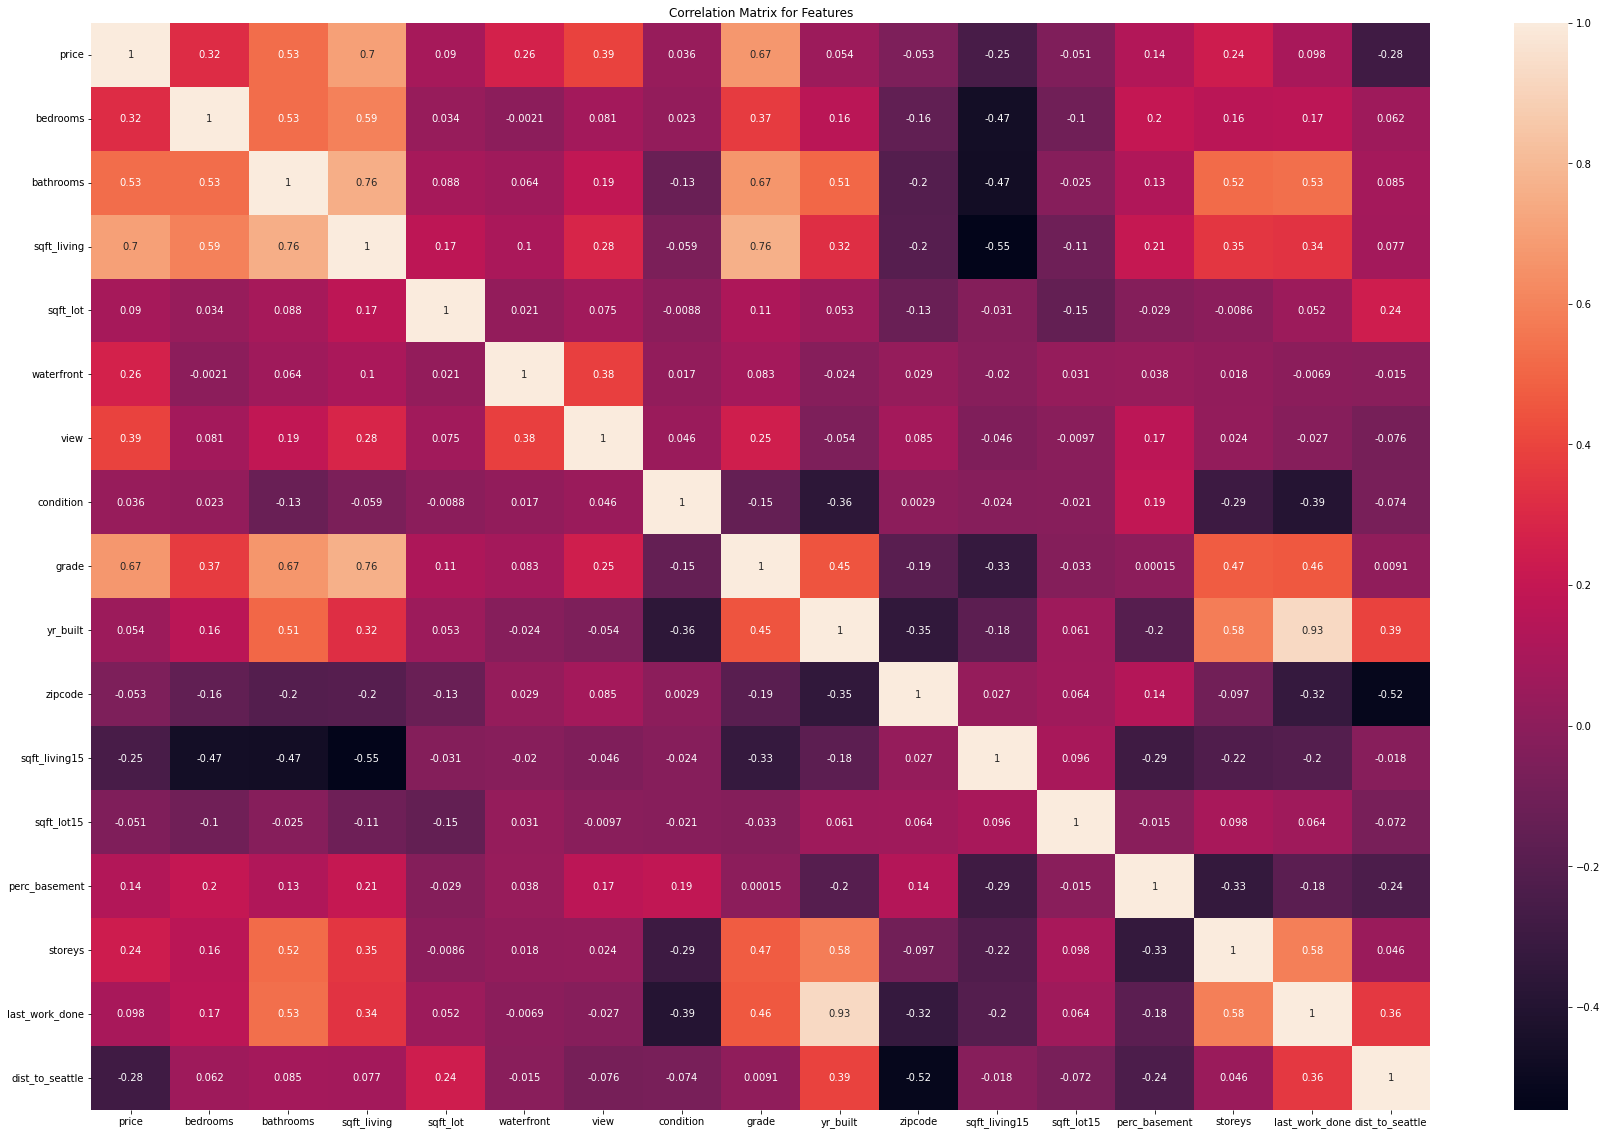

In [38]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.show()

<AxesSubplot:xlabel='condition', ylabel='price'>

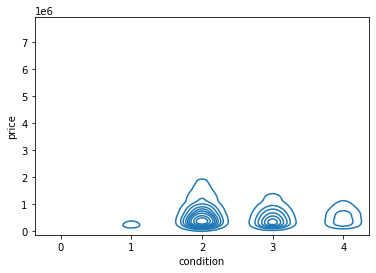

In [39]:
sns.kdeplot(data = df, x='condition', y='price')

bedrooms
bathrooms
sqft_living
sqft_lot
waterfront
view
condition
grade
yr_built
zipcode
sqft_living15
sqft_lot15
perc_basement
storeys
last_work_done
dist_to_seattle


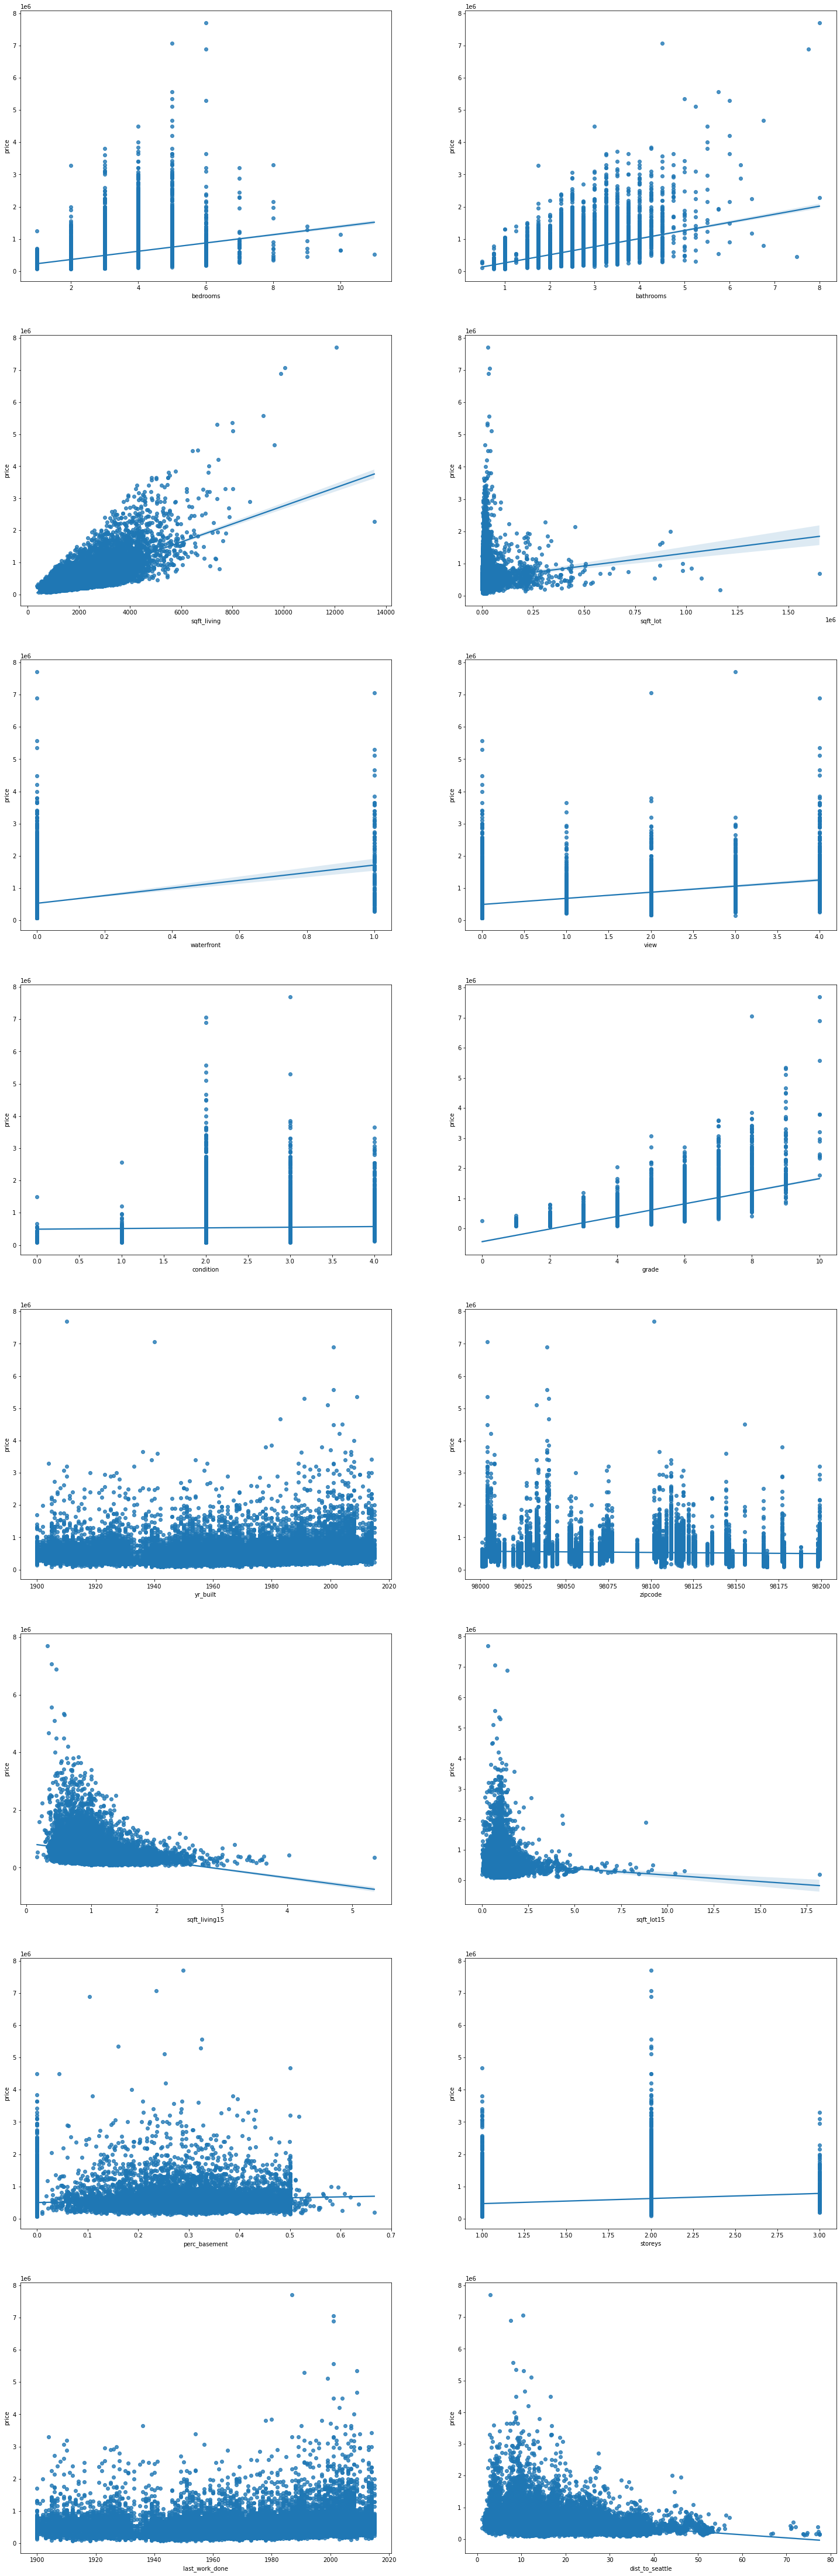

In [40]:
exclude_list = ['price']
frame = df.loc[:, ~df.columns.isin(exclude_list)]
cols = 2
rows = int(len(frame.columns) // cols) + int(len(frame.columns) % cols > 0)
f = plt.figure(figsize=(25,10*rows))
for i, col in enumerate(frame.columns):
    print(col)
    f.add_subplot(rows, cols, i+1)
    sns.regplot(data = frame , x= col, y = df['price'])
plt.show();

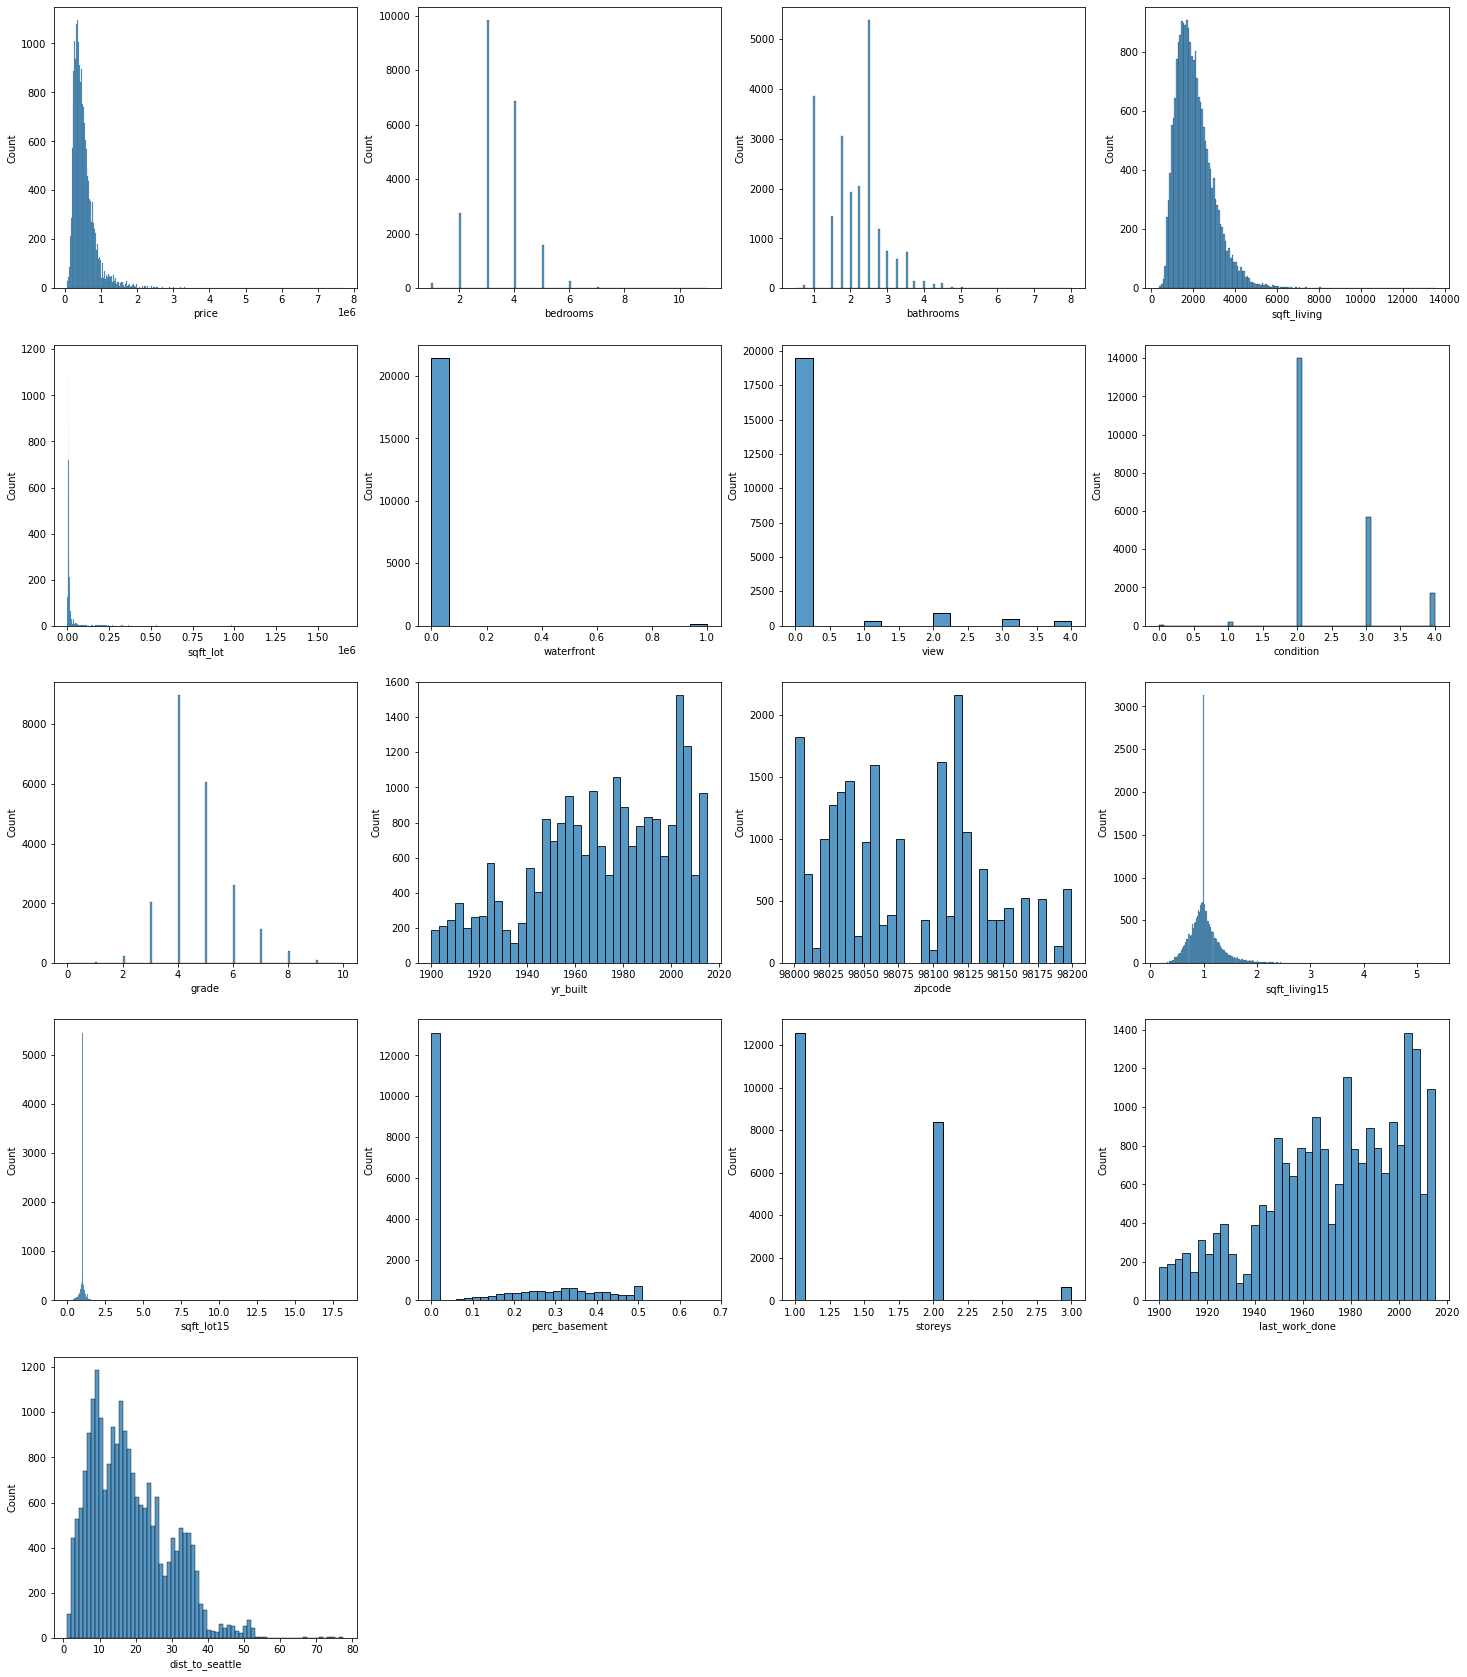

In [41]:
exclude_list = []
frame = df.loc[:, ~df.columns.isin(exclude_list)]
cols = 4
rows = int(len(frame.columns) / cols) + int(len(frame.columns) % cols > 0)
f = plt.figure(figsize=(25,6*rows))
for i, col in enumerate(frame.columns):
    f.add_subplot(rows, cols, i+1)
    sns.histplot(frame[col])
plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='bedrooms'>

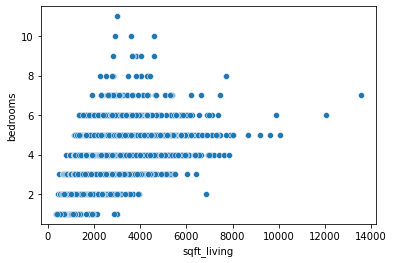

In [42]:
sns.scatterplot(data=df, x='sqft_living',y='bedrooms')

Text(0.5, 1.0, 'String')

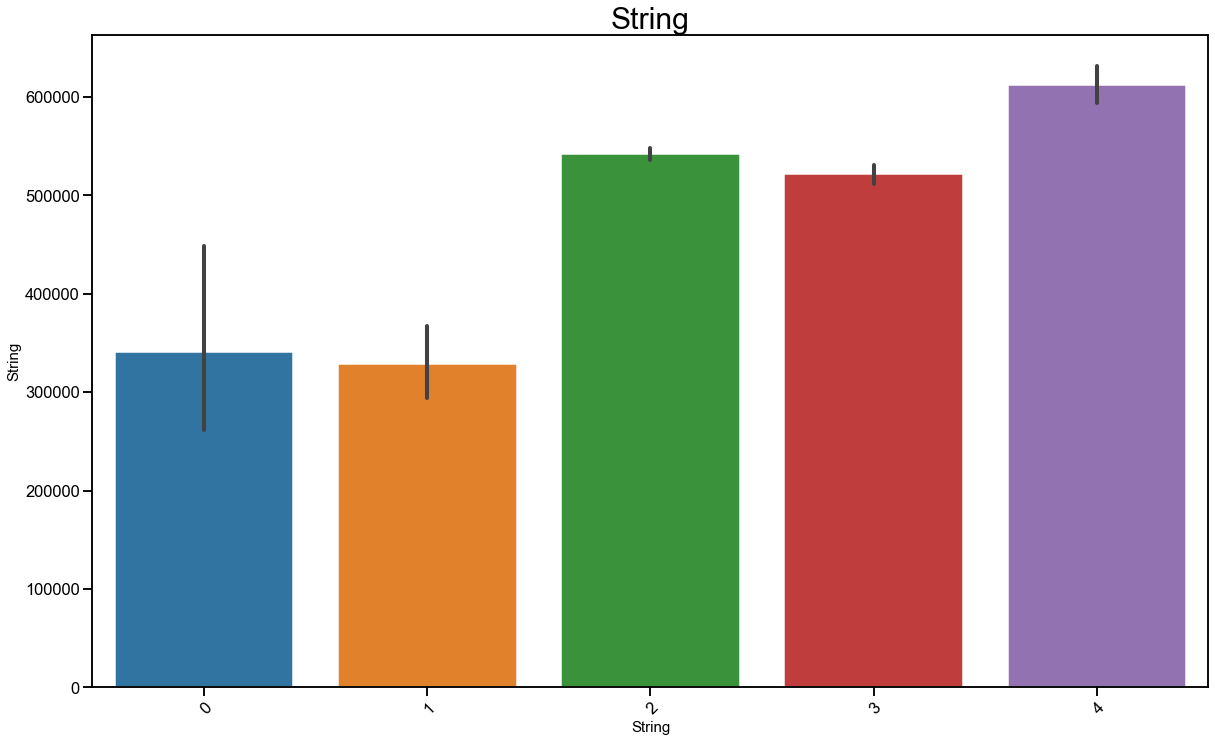

In [43]:
data = df.groupby(['condition']).mean()
x = df['condition']
y = df['price']
title_size = 30
label_size = 15


sns.set_context("talk")
fig, ax=plt.subplots(figsize=(20,12))
sns.set_style("ticks")
p = sns.barplot(ax=ax, data=data, x=x, y=y)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')

p.set_xlabel('String',fontsize=label_size)
p.set_ylabel('String',fontsize=label_size)
p.set_title('String',fontsize=title_size)


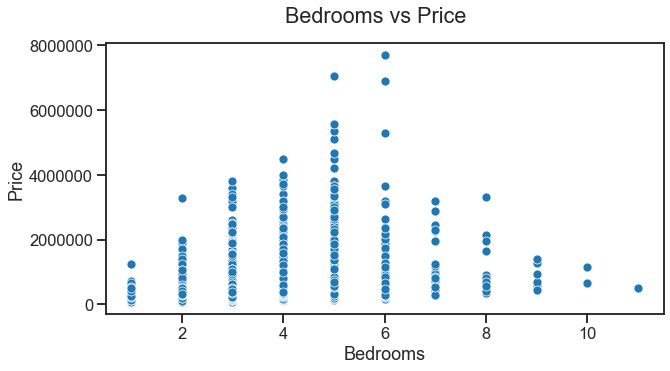

In [46]:
fig, axs = plt.subplots(figsize = (10,5))
fig.suptitle('Bedrooms vs Price')
sns.scatterplot(data = df, x = 'bedrooms', y = 'price').set(xlabel='Bedrooms', ylabel='Price')
plt.ticklabel_format(style='plain', axis='y')

''

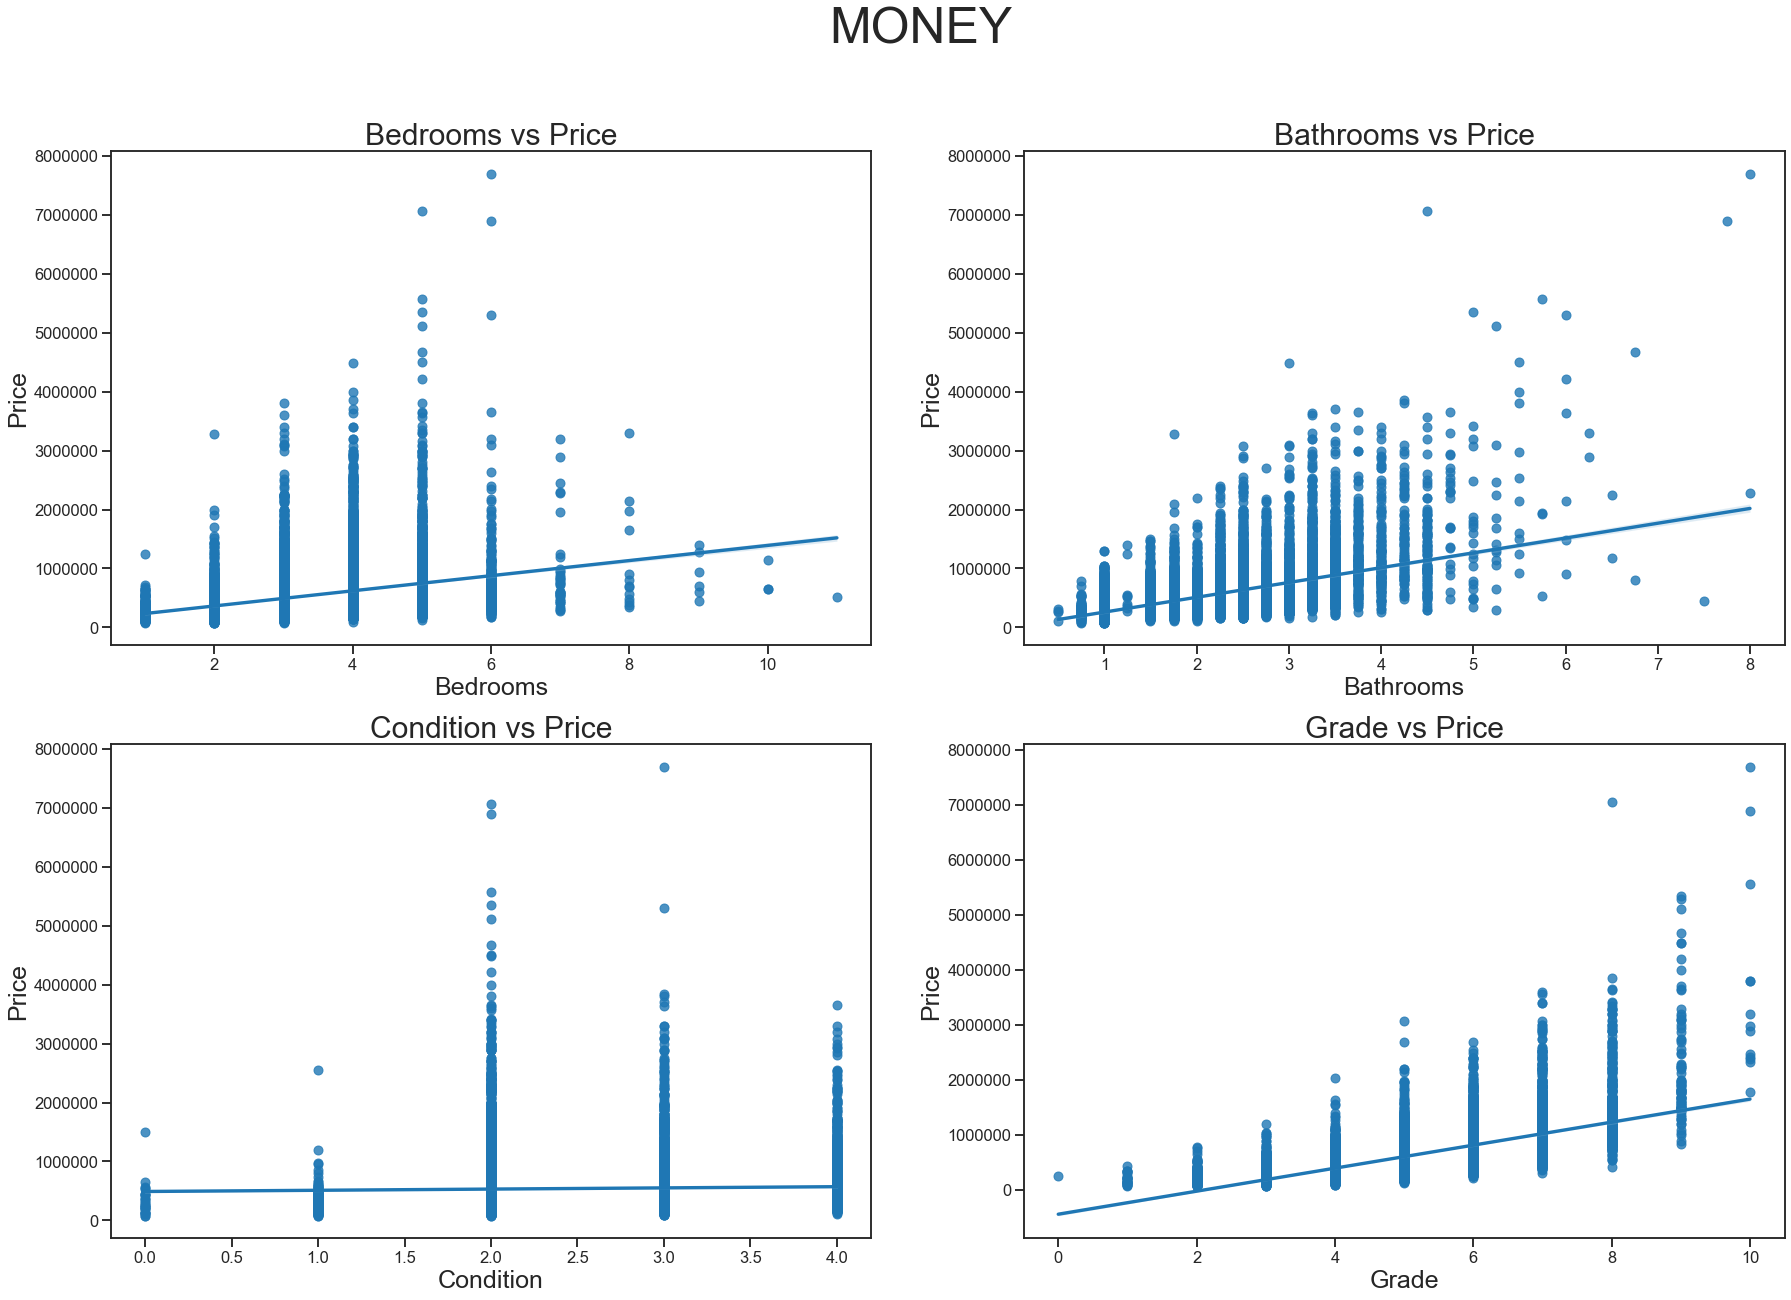

In [47]:
fig, axs = plt.subplots(2,2, figsize = (30,20))
fig.suptitle("MONEY", fontsize = 50)
sns.regplot(x='bedrooms', y='price', data= df, ax=axs[0,0] )
sns.regplot(x="bathrooms", y="price", data = df, ax=axs[0,1])
sns.regplot(x='condition', y='price', data= df, ax = axs [1,0])
sns.regplot(x='grade', y='price', data= df, ax = axs[1,1])
axs[0,0].set_title('Bedrooms vs Price', fontsize = 30)
axs[0,1].set_title('Bathrooms vs Price', fontsize = 30)
axs[1,0].set_title('Condition vs Price', fontsize = 30)
axs[1,1].set_title('Grade vs Price', fontsize = 30)
axs[0,0].ticklabel_format(axis = 'y', style = 'plain')
axs[0,1].ticklabel_format(axis = 'y', style = 'plain')
axs[1,0].ticklabel_format(axis = 'y', style = 'plain')
axs[1,1].ticklabel_format(axis = 'y', style = 'plain')
axs[0,0].set_xlabel("Bedrooms", fontsize = 25)
axs[0,1].set_xlabel("Bathrooms", fontsize = 25)
axs[1,0].set_xlabel("Condition", fontsize = 25)
axs[1,1].set_xlabel("Grade", fontsize = 25)
axs[0,0].set_xlabel("Bedrooms", fontsize = 25)
axs[0,1].set_xlabel("Bathrooms", fontsize = 25)
axs[1,0].set_xlabel("Condition", fontsize = 25)
axs[1,1].set_xlabel("Grade", fontsize = 25)
axs[0,0].set_ylabel("Price", fontsize = 25)
axs[0,1].set_ylabel("Price", fontsize = 25)
axs[1,0].set_ylabel("Price", fontsize = 25)
axs[1,1].set_ylabel("Price", fontsize = 25)
;

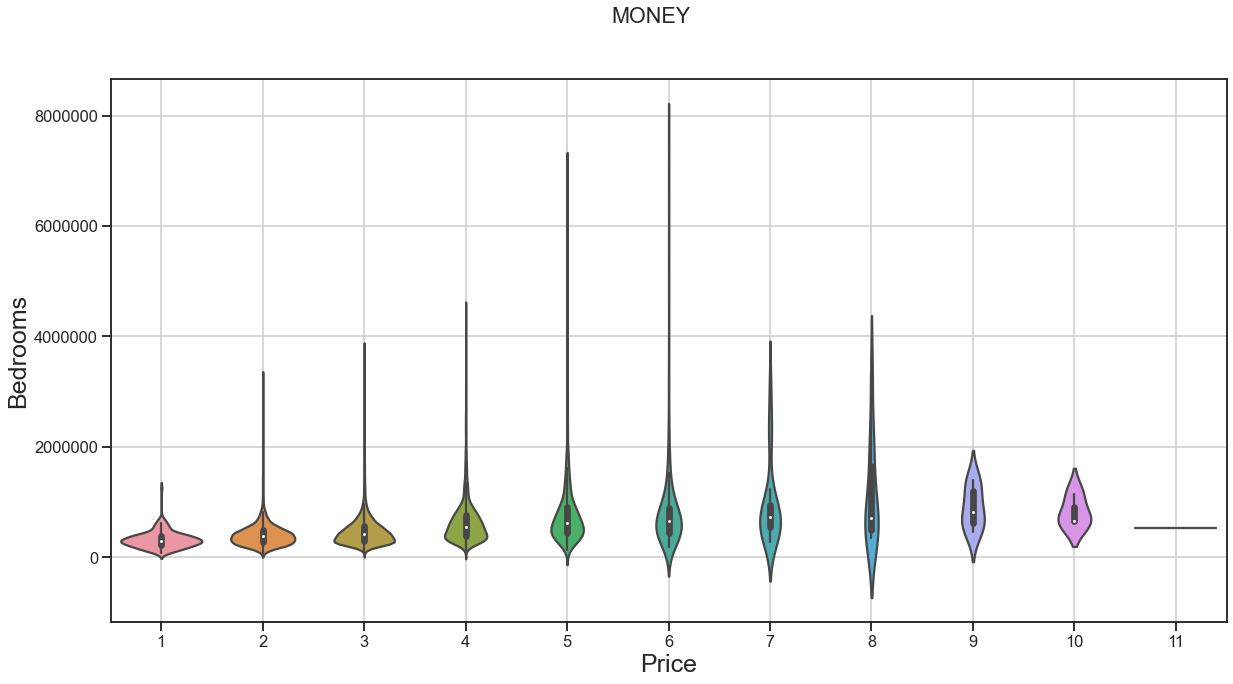

In [48]:
fig, axs = plt.subplots(figsize = (20,10))
fig.suptitle("MONEY")
sns.violinplot(data = df, x = 'bedrooms', y = 'price')
plt.ticklabel_format(style='plain', axis='y')
axs.set_xlabel("Price", fontsize = 25)
axs.set_ylabel("Bedrooms", fontsize = 25)
plt.grid()

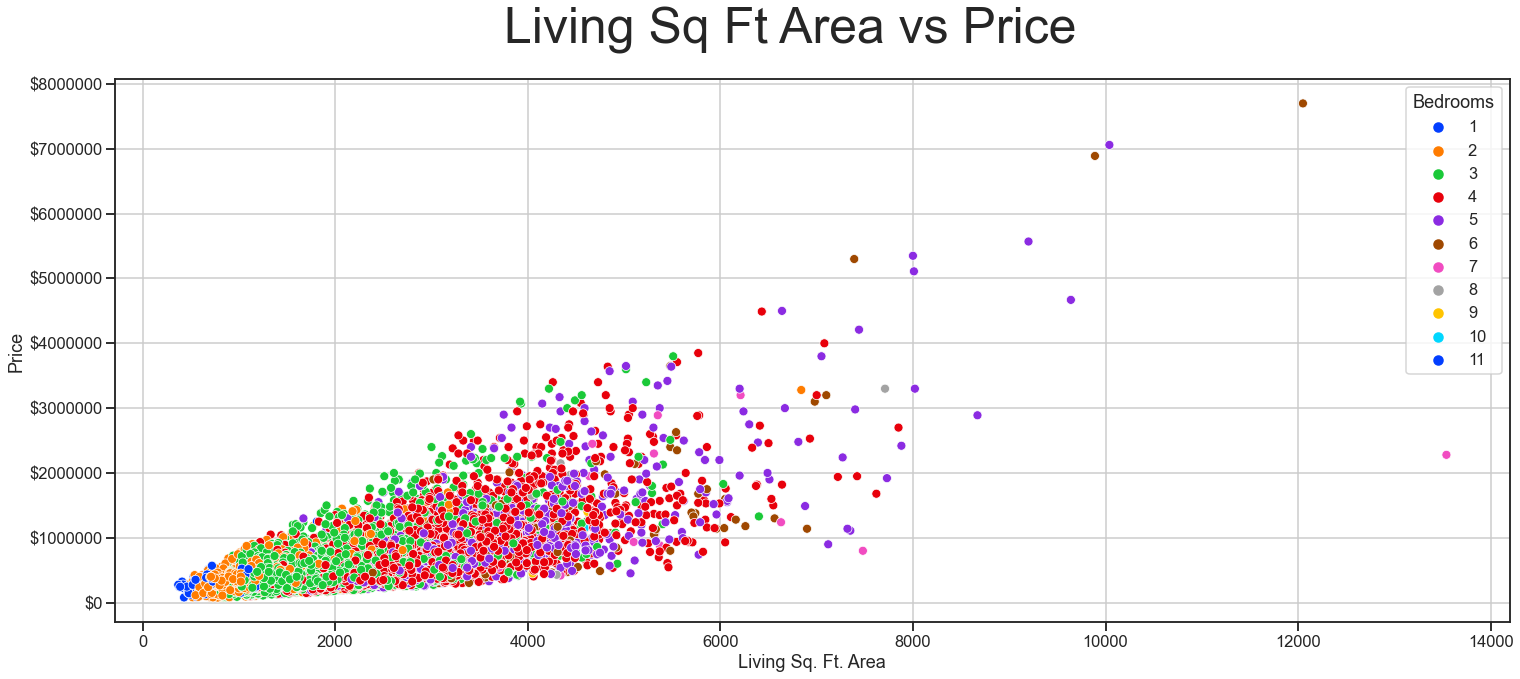

In [49]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', hue = 'bedrooms', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Bedrooms')

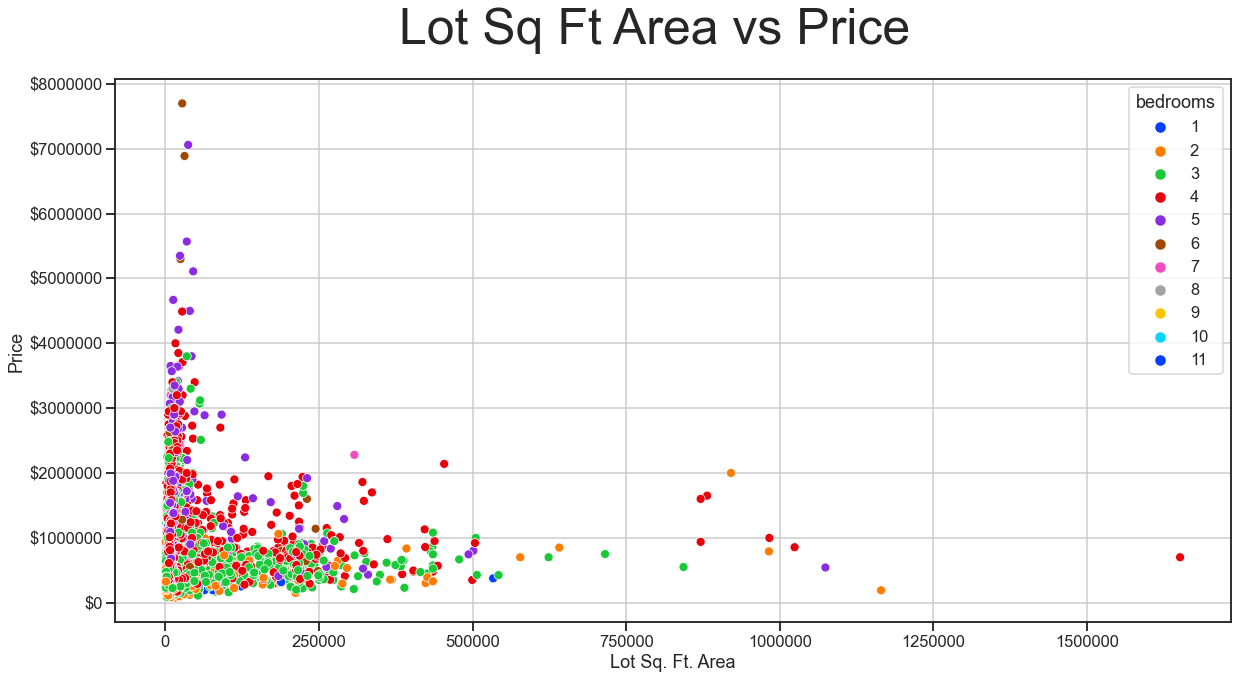

In [50]:
fig, axs = plt.subplots(figsize = (20,10))
fig.suptitle('Lot Sq Ft Area vs Price', fontsize  = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_lot', y = 'price', hue = 'bedrooms', palette = 'bright' ).set(xlabel='Lot Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

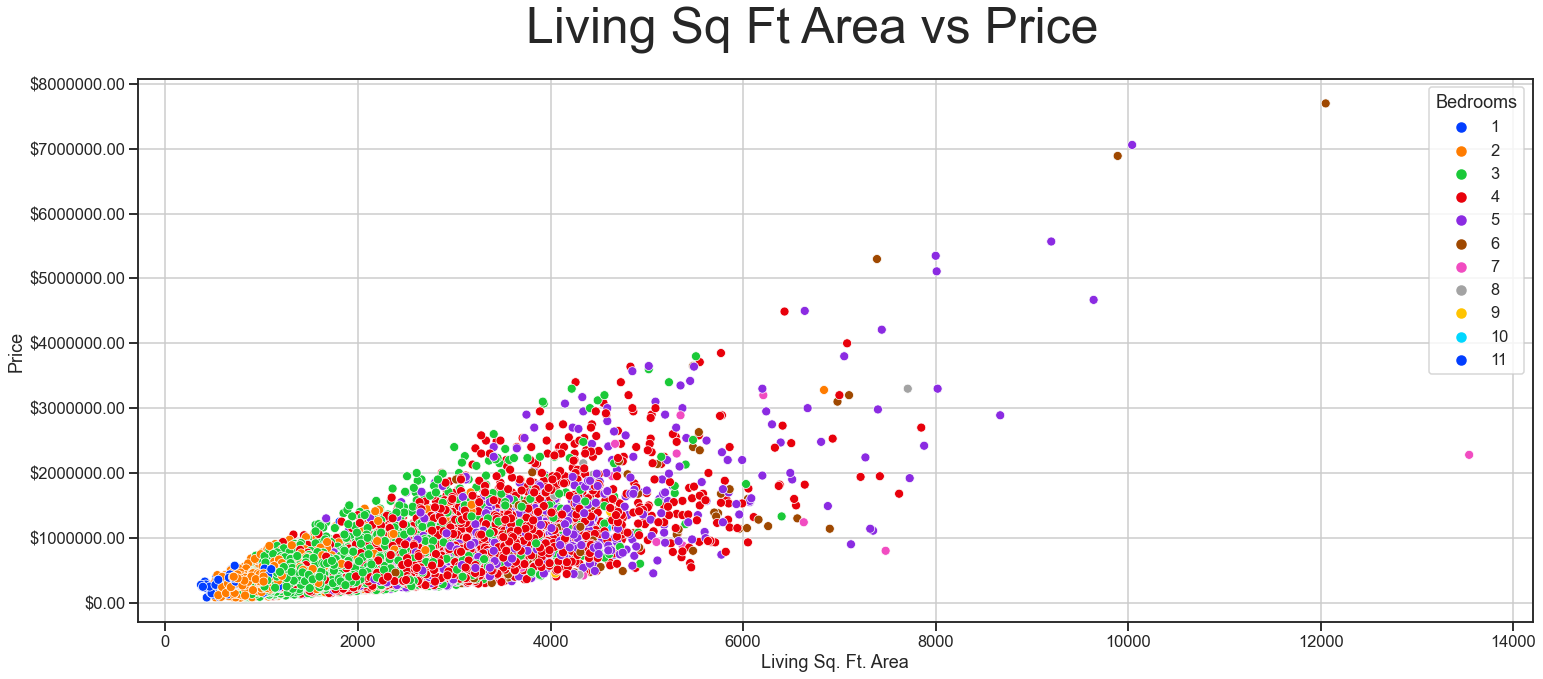

In [51]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.2f}')
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', hue = 'bedrooms', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Bedrooms')

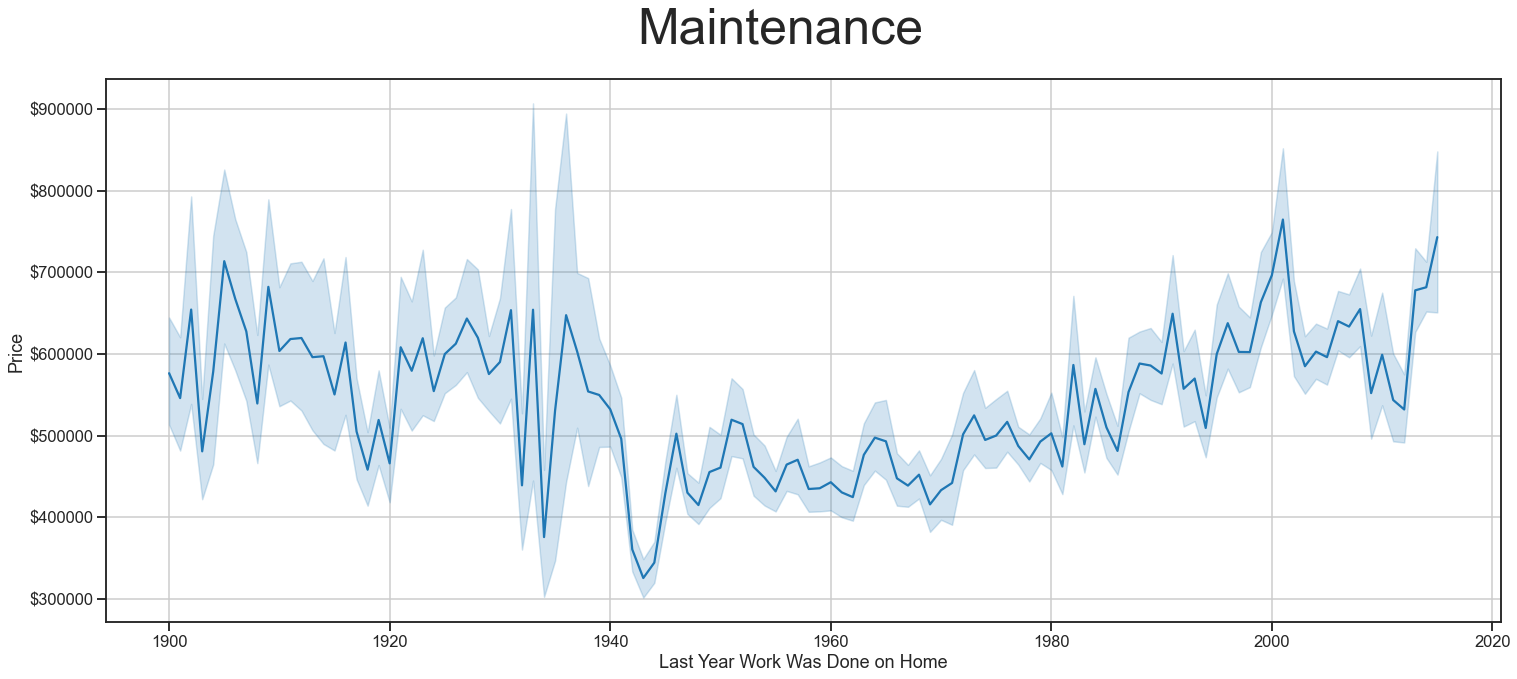

In [52]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Maintenance', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.lineplot(data = df, x = 'last_work_done', y = 'price').set(xlabel='Last Year Work Was Done on Home', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()


[(0.0, 5000.0), (0.0, 500000.0)]

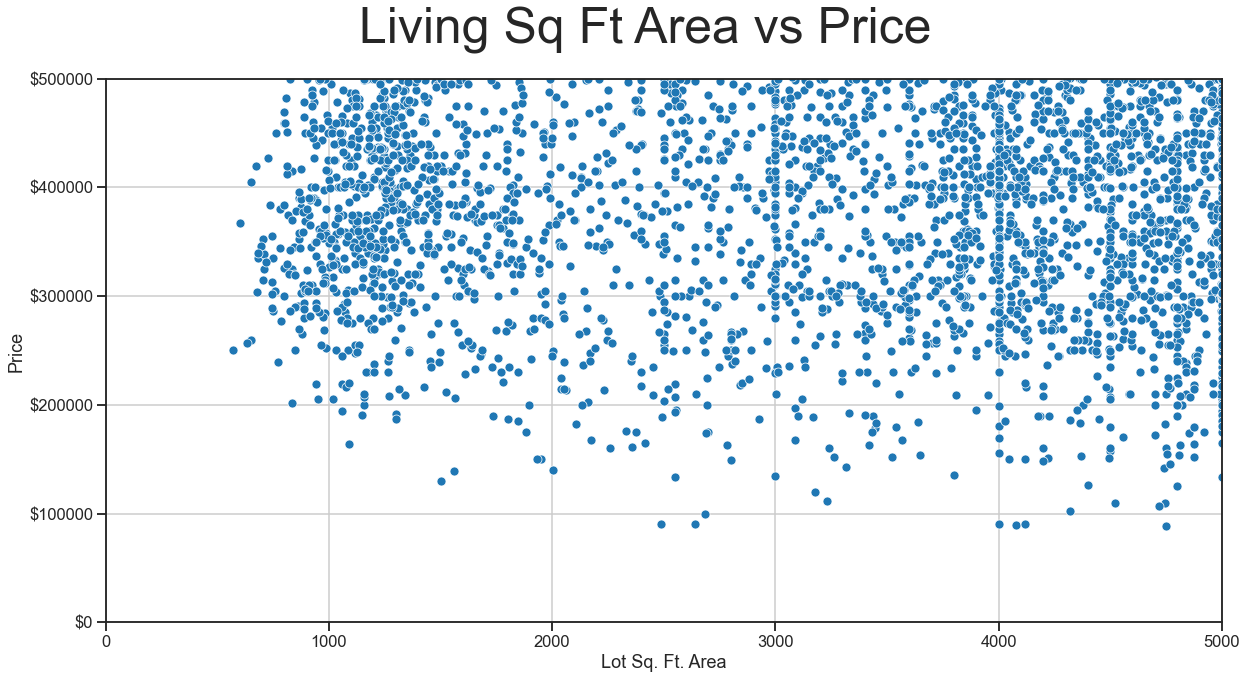

In [53]:
fig, axs = plt.subplots(figsize = (20,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize  = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_lot', y = 'price', palette = 'bright' ).set(xlabel='Lot Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
axs.set(xlim=(0, 5000),ylim=(0,500000))

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21597 non-null  float64
 1   bedrooms         21597 non-null  int64  
 2   bathrooms        21597 non-null  float64
 3   sqft_living      21597 non-null  int64  
 4   sqft_lot         21597 non-null  int64  
 5   waterfront       21597 non-null  int64  
 6   view             21597 non-null  int32  
 7   condition        21597 non-null  int64  
 8   grade            21597 non-null  int32  
 9   yr_built         21597 non-null  int64  
 10  zipcode          21597 non-null  int64  
 11  sqft_living15    21597 non-null  float64
 12  sqft_lot15       21597 non-null  float64
 13  perc_basement    21597 non-null  float64
 14  storeys          21597 non-null  int32  
 15  last_work_done   21597 non-null  float64
 16  dist_to_seattle  21597 non-null  float64
dtypes: float64(7

In [55]:
df = pd.get_dummies(df,columns=['zipcode'],drop_first=True)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
X = df.iloc[:,1:]
y = df.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lm = LinearRegression().fit(X_train,y_train)
lm.score(X_test, y_test)

0.8050123997120487

In [58]:
res_df = pd.DataFrame(X_train.columns,columns=['Feature'])

In [59]:
res_df.set_index('Feature',inplace=True)

In [60]:
lm.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [61]:
res_df['Coefficient'] = lm.coef_

In [62]:
lm.intercept_

643969.9376036049

In [63]:
res_df

,Coefficient
Feature,
bedrooms,-22752.040448
bathrooms,30748.161387
sqft_living,214.895524
sqft_lot,0.106398
waterfront,690412.367872
...,...
zipcode_98177,110636.864099
zipcode_98178,-78842.578280
zipcode_98188,-49202.860097


In [64]:
lm = sm.OLS(y,X).fit()
lm.summary()

NameError: name 'sm' is not defined

In [ ]:
df['predictions'] = lm.predict(X)
df['errors'] = df.predictions - df.price

In [ ]:
df.sort_values(by = ['errors'],ascending=False).head(50)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,predictions,errors
21034,900000.0,5,6.00,7120,40806,0,4,2,9,2007,...,0,0,0,0,0,0,0,0,2.084204e+06,1.184204e+06
12764,2280000.0,7,8.00,13540,307752,0,4,2,9,1999,...,0,0,0,0,0,0,0,0,3.411341e+06,1.131341e+06
4020,800000.0,7,6.75,7480,41664,0,2,2,8,1953,...,0,1,0,0,0,0,0,0,1.804556e+06,1.004556e+06
11544,357000.0,3,2.00,2460,53882,1,4,2,4,1955,...,0,0,0,0,0,0,1,0,1.338500e+06,9.814996e+05
18833,380000.0,3,2.50,1980,17342,1,4,2,7,1984,...,0,1,0,0,0,0,0,0,1.357965e+06,9.779648e+05
17460,540000.0,3,2.50,2600,23361,1,4,2,5,1912,...,0,0,0,0,0,0,0,0,1.501447e+06,9.614474e+05
21356,490000.0,5,3.50,4460,2975,0,2,2,7,2015,...,0,0,0,0,0,0,0,0,1.401312e+06,9.113119e+05
8149,503000.0,2,1.75,2860,59612,1,4,2,5,1948,...,0,0,0,0,0,0,0,0,1.370029e+06,8.670289e+05
1259,995000.0,3,4.50,4380,47044,1,3,2,6,1968,...,0,1,0,0,0,0,0,0,1.858494e+06,8.634943e+05
5173,1160000.0,4,3.00,2680,15438,0,2,2,5,1902,...,0,0,0,0,0,0,0,0,2.008418e+06,8.484177e+05


In [ ]:
df.columns[0:17]

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'perc_basement', 'storeys', 'last_work_done',
       'dist_to_seattle', 'zipcode_98002'],
      dtype='object')

In [ ]:
df_interact = df

In [ ]:
start_i = 1
finish_i = 16
for i,x in enumerate(df.columns[start_i:finish_i]):
    for j,y in enumerate(df.columns[i+start_i:finish_i]):
        df_interact[x+' * '+y] = df[x] * df[y]

C:\Users\kapta\AppData\Local\Temp\ipykernel_20476\3585100791.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_interact[x+' * '+y] = df[x] * df[y]
C:\Users\kapta\AppData\Local\Temp\ipykernel_20476\3585100791.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_interact[x+' * '+y] = df[x] * df[y]
C:\Users\kapta\AppData\Local\Temp\ipykernel_20476\3585100791.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [ ]:
print(df_interact.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'yr_built',
       ...
       'perc_basement * perc_basement', 'perc_basement * storeys',
       'perc_basement * last_work_done', 'perc_basement * dist_to_seattle',
       'storeys * storeys', 'storeys * last_work_done',
       'storeys * dist_to_seattle', 'last_work_done * last_work_done',
       'last_work_done * dist_to_seattle',
       'dist_to_seattle * dist_to_seattle'],
      dtype='object', length=207)


In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df_interact

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,sqft_living15,sqft_lot15,perc_basement,storeys,last_work_done,dist_to_seattle,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,predictions,errors,bedrooms * bedrooms,bedrooms * bathrooms,bedrooms * sqft_living,bedrooms * sqft_lot,bedrooms * waterfront,bedrooms * view,bedrooms * condition,bedrooms * grade,bedrooms * yr_built,bedrooms * sqft_living15,bedrooms * sqft_lot15,bedrooms * perc_basement,bedrooms * storeys,bedrooms * last_work_done,bedrooms * dist_to_seattle,bathrooms * bathrooms,bathrooms * sqft_living,bathrooms * sqft_lot,bathrooms * waterfront,bathrooms * view,bathrooms * condition,bathrooms * grade,bathrooms * yr_built,bathrooms * sqft_living15,bathrooms * sqft_lot15,bathrooms * perc_basement,bathrooms * storeys,bathrooms * last_work_done,bathrooms * dist_to_seattle,sqft_living * sqft_living,sqft_living * sqft_lot,sqft_living * waterfront,sqft_living * view,sqft_living * condition,sqft_living * grade,sqft_living * yr_built,sqft_living * sqft_living15,sqft_living * sqft_lot15,sqft_living * perc_basement,sqft_living * storeys,sqft_living * last_work_done,sqft_living * dist_to_seattle,sqft_lot * sqft_lot,sqft_lot * waterfront,sqft_lot * view,sqft_lot * condition,sqft_lot * grade,sqft_lot * yr_built,sqft_lot * sqft_living15,sqft_lot * sqft_lot15,sqft_lot * perc_basement,sqft_lot * storeys,sqft_lot * last_work_done,sqft_lot * dist_to_seattle,waterfront * waterfront,waterfront * view,waterfront * condition,waterfront * grade,waterfront * yr_built,waterfront * sqft_living15,waterfront * sqft_lot15,waterfront * perc_basement,waterfront * storeys,waterfront * last_work_done,waterfront * dist_to_seattle,view * view,view * condition,view * grade,view * yr_built,view * sqft_living15,view * sqft_lot15,view * perc_basement,view * storeys,view * last_work_done,view * dist_to_seattle,condition * condition,condition * grade,condition * yr_built,condition * sqft_living15,condition * sqft_lot15,condition * perc_basement,condition * storeys,condition * last_work_done,condition * dist_to_seattle,grade * grade,grade * yr_built,grade * sqft_living15,grade * sqft_lot15,grade * perc_basement,grade * storeys,grade * last_work_done,grade * dist_to_seattle,yr_built * yr_built,yr_built * sqft_living15,yr_built * sqft_lot15,yr_built * perc_basement,yr_built * storeys,yr_built * last_work_done,yr_built * dist_to_seattle,sqft_living15 * sqft_living15,sqft_living15 * sqft_lot15,sqft_living15 * perc_basement,sqft_living15 * storeys,sqft_living15 * last_work_done,sqft_living15 * dist_to_seattle,sqft_lot15 * sqft_lot15,sqft_lot15 * perc_basement,sqft_lot15 * storeys,sqft_lot15 * last_work_done,sqft_lot15 * dist_to_seattle,perc_basement * perc_basement,perc_basement * storeys,perc_basement * last_work_done,perc_basement * dist_to_seattle,storeys * storeys,storeys * last_work_done,storeys * dist_to_seattle,last_work_done * last_work_done,last_work_done * dist_to_seattle,dist_to_seattle * dist_to_seattle
0,221900.0,3,1.00,1180,5650,0,0,2,4,1955,1.135593,1.000000,0.0000

In [ ]:
df.columns[16:85]

Index(['zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
       

In [ ]:
start_i = 16
finish_i = 85

for i,x in enumerate(df.columns[start_i:85]):
    for j,y in enumerate(df.columns[0:start_i]):
        df[x+' * '+y] = df[x] * df[y]

C:\Users\kapta\AppData\Local\Temp\ipykernel_20476\4041523657.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x+' * '+y] = df[x] * df[y]
C:\Users\kapta\AppData\Local\Temp\ipykernel_20476\4041523657.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x+' * '+y] = df[x] * df[y]
C:\Users\kapta\AppData\Local\Temp\ipykernel_20476\4041523657.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,sqft_living15,sqft_lot15,perc_basement,storeys,last_work_done,dist_to_seattle,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,predictions,errors,bedrooms * bedrooms,bedrooms * bathrooms,bedrooms * sqft_living,bedrooms * sqft_lot,bedrooms * waterfront,bedrooms * view,bedrooms * condition,bedrooms * grade,bedrooms * yr_built,bedrooms * sqft_living15,bedrooms * sqft_lot15,bedrooms * perc_basement,bedrooms * storeys,bedrooms * last_work_done,bedrooms * dist_to_seattle,bathrooms * bathrooms,bathrooms * sqft_living,bathrooms * sqft_lot,bathrooms * waterfront,bathrooms * view,bathrooms * condition,bathrooms * grade,bathrooms * yr_built,bathrooms * sqft_living15,bathrooms * sqft_lot15,bathrooms * perc_basement,bathrooms * storeys,bathrooms * last_work_done,bathrooms * dist_to_seattle,sqft_living * sqft_living,sqft_living * sqft_lot,sqft_living * waterfront,sqft_living * view,sqft_living * condition,sqft_living * grade,sqft_living * yr_built,sqft_living * sqft_living15,sqft_living * sqft_lot15,sqft_living * perc_basement,sqft_living * storeys,sqft_living * last_work_done,sqft_living * dist_to_seattle,sqft_lot * sqft_lot,sqft_lot * waterfront,sqft_lot * view,sqft_lot * condition,sqft_lot * grade,sqft_lot * yr_built,sqft_lot * sqft_living15,sqft_lot * sqft_lot15,sqft_lot * perc_basement,sqft_lot * storeys,sqft_lot * last_work_done,sqft_lot * dist_to_seattle,waterfront * waterfront,waterfront * view,waterfront * condition,waterfront * grade,waterfront * yr_built,waterfront * sqft_living15,waterfront * sqft_lot15,waterfront * perc_basement,waterfront * storeys,waterfront * last_work_done,waterfront * dist_to_seattle,view * view,view * condition,view * grade,view * yr_built,view * sqft_living15,view * sqft_lot15,view * perc_basement,view * storeys,view * last_work_done,view * dist_to_seattle,condition * condition,condition * grade,condition * yr_built,condition * sqft_living15,condition * sqft_lot15,condition * perc_basement,condition * storeys,condition * last_work_done,condition * dist_to_seattle,grade * grade,grade * yr_built,grade * sqft_living15,grade * sqft_lot15,grade * perc_basement,grade * storeys,grade * last_work_done,grade * dist_to_seattle,yr_built * yr_built,yr_built * sqft_living15,yr_built * sqft_lot15,yr_built * perc_basement,yr_built * storeys,yr_built * last_work_done,yr_built * dist_to_seattle,sqft_living15 * sqft_living15,sqft_living15 * sqft_lot15,sqft_living15 * perc_basement,sqft_living15 * storeys,sqft_living15 * last_work_done,sqft_living15 * dist_to_seattle,sqft_lot15 * sqft_lot15,sqft_lot15 * perc_basement,sqft_lot15 * storeys,sqft_lot15 * last_work_done,sqft_lot15 * dist_to_seattle,perc_basement * perc_basement,perc_basement * storeys,perc_basement * last_work_done,perc_basement * dist_to_seattle,storeys * storeys,storeys * last_work_done,storeys * dist_to_seattle,last_work_done * last_work_done,last_work_done * dist_to_seattle,dist_to_seattle * dist_to_seattle,zipcode_98002 * price,zipcode_98002 * bedrooms,zipcode_98002 * ba

In [ ]:
int_df = df.drop(columns = ['predictions','errors'])

In [ ]:

X = sm.add_constant(int_df.iloc[:,1:], prepend=False)
y = int_df.price

lm = sm.OLS(y_train,X_train)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.415e+04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:49:54   Log-Likelihood:            -1.5336e+05
No. Observations:               15117   AIC:                         3.090e+05
Df Residuals:                   13982   BIC:                         3.176e+05
Df Model:                        1134                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
bedrooms                          -1.812e+04   9520.389     -1.903      0.057   -3.68e+04     540.511
bathrooms                          1.786e+04   1.55e+04      1.150      0.250   -1.26e+04    4.83e+04
sqft_living                          93.2175     18.536      5.029      0.000      56.885     129.550
sqft_lot                              0.4551      0.282      1.616      0.106      -0.097       1.007
waterfront                         1.264e+04    6.8e+04      0.186      0.853   -1.21e+05    1.46e+05
view                              -8900.6682   1.09e+04     -0.817      0.414   -3.02e+04    1.24e+04
condition                         -2.189e+04   1.32e+04     -1.654      0.098   -4.78e+04    4046.656
grade                              1.529e+04    1.1e+04      1.387      0.166   -6327.534    3.69e+04
yr_built                          -1969.3753   1208.921     -1.629      0.103   -4339.022     400.272
sqft_living15                      3.539e+04   2.89e+04      1.224      0.221   -2.13e+04    9.21e+04
sqft_lot15                         1.989e+04   1.75e+04      1.137      0.256   -1.44e+04    5.42e+04
perc_basement                      1.065e+05   5.24e+04      2.032      0.042    3749.408    2.09e+05
storeys                             6.11e+04   2.05e+04      2.986      0.003     2.1e+04    1.01e+05
last_work_done                      654.7198   1178.161      0.556      0.578   -1654.633    2964.073
dist_to_seattle                   -4300.8510   3569.827     -1.205      0.228   -1.13e+04    2696.487
zipcode_98002                      5.348e+05   1.01e+05      5.279      0.000    3.36e+05    7.33e+05
zipcode_98003                      5.471e+05    1.2e+05      4.573      0.000    3.13e+05    7.82e+05
zipcode_98004                       4.99e+05   1.37e+05      3.647      0.000    2.31e+05    7.67e+05
zipcode_98005                      5.048e+05   1.78e+05      2.834      0.005    1.56e+05    8.54e+05
zipcode_98006                      5.072e+05   1.28e+05      3.969      0.000    2.57e+05    7.58e+05
zipcode_98007                      5.763e+05   2.71e+05      2.128      0.033    4.55e+04    1.11e+06
zipcode_98008                      5.212e+05   1.75e+05      2.984      0.003    1.79e+05    8.64e+05
zipcode_98010                      5.062e+05   1.27e+05      3.998      0.000    2.58e+05    7.54e+05
zipcode_98011                      4.899e+05   1.28e+05      3.815      0.000    2.38e+05    7.42e+05
zipcode_98014                       5.85e+05   1.13e+05      5.160      0.000    3.63e+05    8.07e+05
zipcode_98019                      5.558e+05   1.39e+05      3.989      0.000    2.83e+05    8.29e+05
zipcode_98022                      5.835e+05   1.08e+05      5.390      0.000    3.71e+05    7.96e+05
zipcode_98023          